<a href="https://colab.research.google.com/github/jaeyeon1234/25-winter-subway/blob/main/%EC%A7%80%ED%95%98%EC%B2%A0_%ED%94%8C%EC%A0%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/서울교통공사_지하철혼잡도정보_20251130.csv", encoding='cp949')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Data columns (total 44 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   요일구분    1671 non-null   object 
 1   호선      1671 non-null   object 
 2   역번호     1671 non-null   int64  
 3   출발역     1671 non-null   object 
 4   상하구분    1671 non-null   object 
 5   5시30분   1671 non-null   float64
 6   6시00분   1671 non-null   float64
 7   6시30분   1671 non-null   float64
 8   7시00분   1671 non-null   float64
 9   7시30분   1671 non-null   float64
 10  8시00분   1671 non-null   float64
 11  8시30분   1671 non-null   float64
 12  9시00분   1671 non-null   float64
 13  9시30분   1671 non-null   float64
 14  10시00분  1671 non-null   float64
 15  10시30분  1671 non-null   float64
 16  11시00분  1671 non-null   float64
 17  11시30분  1671 non-null   float64
 18  12시00분  1671 non-null   float64
 19  12시30분  1671 non-null   float64
 20  13시00분  1671 non-null   float64
 21  13시30분  1671 non-null   float64
 22  

In [ ]:
#wide-> long  형태로 변환 (세로로 열기)

df_long = df.melt(
    id_vars=['요일구분', '호선', '역번호','출발역', '상하구분'],
    var_name = '시간',
    value_name='혼잡도'
)

df_long.head()

,요일구분,호선,역번호,출발역,상하구분,시간,혼잡도
0,평일,1호선,150,서울역,상선,5시30분,8.3
1,평일,1호선,150,서울역,하선,5시30분,10.5
2,평일,1호선,151,시청,상선,5시30분,6.9
3,평일,1호선,151,시청,하선,5시30분,8.5
4,평일,1호선,152,종각,상선,5시30분,6.3


In [ ]:
df_long['시간'] = df_long['시간'].str.replace('시', '')
df_long['시간'] =   df_long['시간'].str.replace('분','')
df_long['시간'] = df_long['시간'].astype(int)

In [ ]:
#데이터분석 단계
#특정 역 보기

df_test = df[
    (df['출발역'] == df['출발역'].iloc[0]) &
    (df['요일구분'] == df['요일구분'].iloc[0]) &
    (df['상하구분']== df['상하구분'].iloc[0] )
]

print(df_test)

    요일구분   호선  역번호  출발역 상하구분  5시30분  6시00분  6시30분  7시00분  7시30분  ...  20시00분  \
0     평일  1호선  150  서울역   상선    8.3   20.8   21.3   37.4   65.8  ...    19.3   
230   평일  4호선  426  서울역   상선   12.7   20.2   20.1   27.4   37.1  ...    23.8   

     20시30분  21시00분  21시30분  22시00분  22시30분  23시00분  23시30분  00시00분  00시30분  
0      18.3    19.1    15.6    16.1    17.4    14.5     8.6     5.6     1.4  
230    24.1    25.0    21.3    30.0    28.9    20.9    18.1    11.1     6.1  

[2 rows x 44 columns]


In [ ]:
time_columns = df.columns[5:]

In [ ]:
!sudo apt-get install -y fonts-nanum

!sudo fc-cache -fv

!rm ~/.cache/matplotlib -rf

# 이 셀을 실행한 후 '런타임 > 세션 시작’ 클릭

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 2 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False


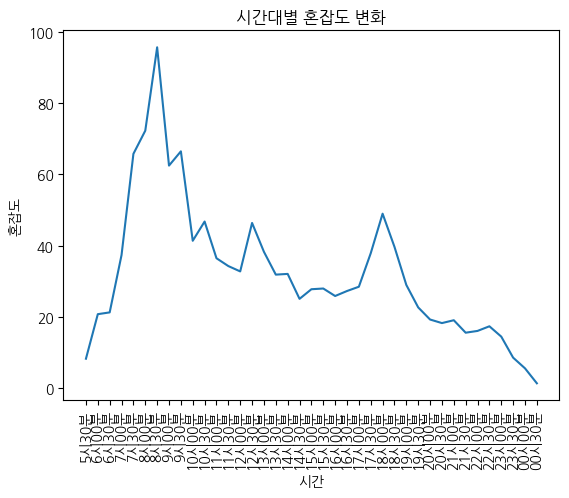

In [ ]:
import matplotlib.pyplot as plt

values = df_test.iloc[0, 5:].values
plt.figure()
plt.plot(time_columns, values)
plt.xticks(rotation=90)
plt.xlabel("시간")
plt.ylabel("혼잡도")
plt.title("시간대별 혼잡도 변화")

plt.show()

그래프 해석:
7-9시 출근 피크 (95정도)
낮에 완만하게 감소
17-18시 다시 퇴근 피크 상승
밤으로 갈수록 감소 (0근처)

In [ ]:
#이동평균 코드

#목표: 이전 3개 시간 평균으로 다음 시간 예측

import numpy as np

values = df_test.iloc[0, 5:].values

window_size = 3
moving_avg = []

for i in range(len(values)):
    if i < window_size:
        moving_avg.append(np.nan)  # 처음 3개는 계산 불가
    else:
        avg = np.mean(values[i-window_size:i])
        moving_avg.append(avg)


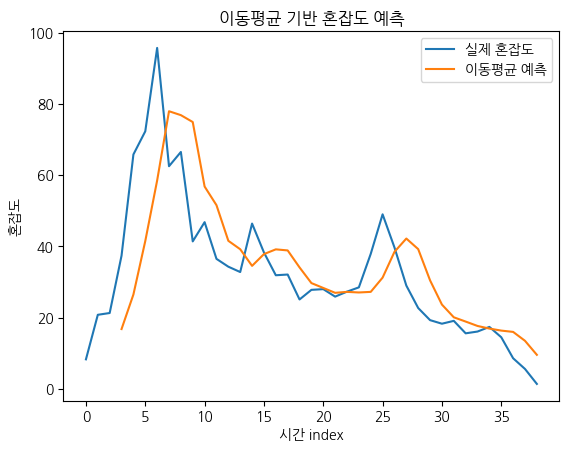

In [ ]:
#실제값 vs 예측값 비교 그래프

import matplotlib.pyplot as plt

plt.figure()
plt.plot(values, label="실제 혼잡도")
plt.plot(moving_avg, label="이동평균 예측")
plt.legend()
plt.xlabel("시간 index")
plt.ylabel("혼잡도")
plt.title("이동평균 기반 혼잡도 예측")
plt.show()


이동 평균 선이 실제값보다 부드러움.
피크를 살짝 늦게 따라가고, 급격한 상승을 못 잡음

In [ ]:
#학습 모델 만들기

import numpy as np

values = df_test.iloc[0, 5:].values

window_size = 3

X = []
y = []

for i in range(len(values) - window_size):
    X.append(values[i:i+window_size])
    y.append(values[i+window_size])

X = np.array(X)
y = np.array(y)

print(X.shape, y.shape)


(36, 3) (36,)


In [ ]:
# train / test

split = int(len(X)* 0.8)

X_train = X[:split]
X_test = X[split:]

y_train = y[:split]
y_test = y[split:]

In [ ]:
#경량 DNN 만들기 (TensorFlow)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    keras.Input(shape=(window_size,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mse'
)

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 32)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 673 (2.63 KB)

 Trainable params: 673 (2.63 KB)

 Non-trainable params: 0 (0.00 B)

모델 구조 분석:
파라미터 수: 673개 (엄청 초경량 모델)
과적합 위험도 낮음

In [ ]:
print(X.dtype)
print(y.dtype)

object
float64


X가 object인거 float 변환해줘야함...

In [ ]:
#혹시 모르니까 그냥 싹다 변환해주기

X = X.astype(np.float32)
y = y.astype(np.float32)

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


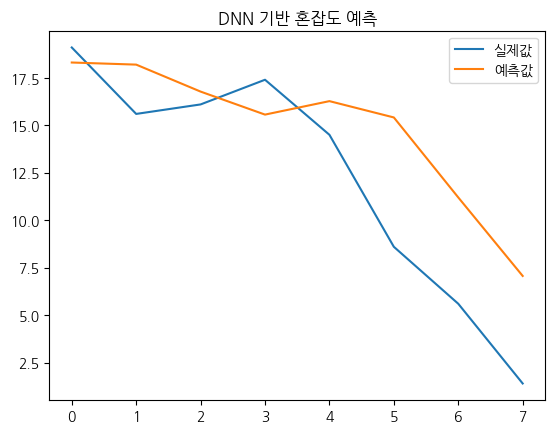

In [ ]:
#학습


model.compile(
    optimizer='adam',
    loss='mse'
)

history = model.fit(
    X_train, y_train,
    epochs=200,
    verbose=0
)

#예측 & 시각화
pred = model.predict(X_test)

plt.figure()
plt.plot(y_test, label="실제값")
plt.plot(pred, label="예측값")
plt.legend()
plt.title("DNN 기반 혼잡도 예측")
plt.show()

결과 분석
-전체적인 감소 추세는 따라가고 있음
-아예 엉뚱한 값은 없음
-패턴 학습

-피크를 정확히 못 잡음
-값이 평균쪽으로 몰려잇음
-약간 둔함

-> 데이터가 36개 밖에 없어서!
(상선+평일+서울역 만 분석한 거임.. 잘되는지 확인용)

In [ ]:
#성능수치

from sklearn.metrics import mean_squared_error

mse_dnn = mean_squared_error(y_test, pred)
print("DNN MSE:", mse_dnn)

DNN MSE: 15.527793884277344


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1,1)).flatten()


#데이터 정규화

In [ ]:
print(df.shape)

(1671, 44)


In [ ]:
print(df["요일구분"].nunique)

<bound method IndexOpsMixin.nunique of 0        평일
1        평일
2        평일
3        평일
4        평일
       ... 
1666    일요일
1667    일요일
1668    일요일
1669    일요일
1670    일요일
Name: 요일구분, Length: 1671, dtype: object>


In [ ]:
#전체 데이터 기반 시계열 학습

#각행(역/요일/방향 하루 패턴) 을 하나의 시계열로 보고
#window 방식으로 학습 데이터 생성
#전체 1671행 다 사용

#시간 칼럼만 추출
import numpy as np
import pandas as pd

time_columns = df.columns[5:]  # 시간대 컬럼들
print(len(time_columns))  # 36 나와야 정상

39


In [ ]:
time_columns = [col for col in df.columns if "시" in col]
print(len(time_columns))

39


In [ ]:
#혼잡도 숫자로 변환
df[time_columns] = df[time_columns].apply(pd.to_numeric, errors='coerce')

In [ ]:
#전체 시계열 데이터 만들기
window_size = 6

X = []
y = []

for _, row in df.iterrows():
    series = row[time_columns].values.astype(float)

    for i in range(len(series) - window_size):
        X.append(series[i:i+window_size])
        y.append(series[i+window_size])

X = np.array(X)
y = np.array(y)

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (55143, 6)
y shape: (55143,)


In [ ]:
# train / test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape)

(44114, 6) (11029, 6)


In [ ]:
#Dense 모델
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Input(shape=(window_size,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,561 (10.00 KB)

 Trainable params: 2,561 (10.00 KB)

 Non-trainable params: 0 (0.00 B)

파라미터 2561

In [ ]:
#학습

history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/30
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 100.6189 - mae: 5.7338 - val_loss: 46.0854 - val_mae: 4.6755
Epoch 2/30
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 34.4308 - mae: 3.7926 - val_loss: 36.8216 - val_mae: 3.9081
Epoch 3/30
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 32.8856 - mae: 3.6846 - val_loss: 34.2503 - val_mae: 3.7038
Epoch 4/30
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 33.7606 - mae: 3.7164 - val_loss: 33.6904 - val_mae: 3.6729
Epoch 5/30
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 32.6696 - mae: 3.6729 - val_loss: 37.3870 - val_mae: 3.9792
Epoch 6/30
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 32.5247 - mae: 3.6547 - val_loss: 34.0340 - val_mae: 3.7462
Epoch 7/30
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 31.5313 - mae: 3.6036 - val_loss: 32.6446 - val_mae: 3.6284
Epoch 8/30
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 32.3290 - mae: 3.6267 - val_loss: 33.7124 - val_mae: 3.6767
Epoch 9/30
1103/1103 ━━

In [ ]:
#MAE 확인 (1~3 : 매우좋음, 3~6: 현실적, 10 이상: 스케일링 필요)

loss, mae = model.evaluate(X_test, y_test)
print("Test MAE:", mae)

345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 29.6878 - mae: 3.4515
Test MAE: 3.562980890274048


In [ ]:
#스케일링

from sklearn.preprocessing import MinMaxScaler

x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_train_scaled = x_scaler.fit_transform(X_train)
X_test_scaled = x_scaler.transform(X_test)

y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1,1)).flatten()
y_test_scaled = y_scaler.transform(y_test.reshape(-1,1)).flatten()

history = model.fit(
    X_train_scaled, y_train_scaled,
    epochs=30,
    batch_size=32,
    validation_split=0.2
)

pred_scaled = model.predict(X_test_scaled)
pred = y_scaler.inverse_transform(pred_scaled)

Epoch 1/30
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0040 - mae: 0.0442 - val_loss: 0.0020 - val_mae: 0.0280
Epoch 2/30
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0018 - mae: 0.0271 - val_loss: 0.0017 - val_mae: 0.0270
Epoch 3/30
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0016 - mae: 0.0261 - val_loss: 0.0016 - val_mae: 0.0256
Epoch 4/30
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0016 - mae: 0.0262 - val_loss: 0.0016 - val_mae: 0.0253
Epoch 5/30
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0016 - mae: 0.0274 - val_loss: 0.0017 - val_mae: 0.0272
Epoch 6/30
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0016 - mae: 0.0271 - val_loss: 0.0016 - val_mae: 0.0260
Epoch 7/30
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0016 - mae: 0.0269 - val_loss: 0.0016 - val_mae: 0.0257
Epoch 8/30
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0016 - mae: 0.0272 - val_loss: 0.0018 - val_mae: 0.0299
Epoch 9/30
1103/1103 ━━━━━━━━━━━━━━━━━━━

In [ ]:
mae = mean_absolute_error(
    y_scaler.inverse_transform(y_test_scaled.reshape(-1,1)),
    y_scaler.inverse_transform(pred_scaled)
)

print("스케일링 후 Test MAE:", mae)

스케일링 후 Test MAE: 3.7248502354829105


Dense 끝.
LSTM 이랑 비교할거..
LSTM 은 3차원  -> 데이터 reshape 해줘야함

In [ ]:
#데이터 reshape

X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print(X_train_lstm.shape)

(44114, 6, 1)


In [ ]:
#LSTM 모델 생성

from tensorflow import keras
from tensorflow.keras import layers

lstm_model = keras.Sequential([
    layers.LSTM(64, input_shape=(X_train.shape[1], 1)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

lstm_model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

lstm_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,009 (74.25 KB)

 Trainable params: 19,009 (74.25 KB)

 Non-trainable params: 0 (0.00 B)

파라미터 개수가 거의 10배 넘게 뜀!! -> 더 정교한 모델^^

In [ ]:
#학습

history_lstm = lstm_model.fit(
    X_train_lstm, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/30
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 311.5109 - mae: 10.0996 - val_loss: 37.4778 - val_mae: 3.7800
Epoch 2/30
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 34.8026 - mae: 3.6936 - val_loss: 36.1691 - val_mae: 3.8241
Epoch 3/30
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 33.1197 - mae: 3.6361 - val_loss: 36.4213 - val_mae: 3.8423
Epoch 4/30
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 33.1518 - mae: 3.6853 - val_loss: 34.3614 - val_mae: 3.6736
Epoch 5/30
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 32.9721 - mae: 3.6579 - val_loss: 34.1317 - val_mae: 3.6522
Epoch 6/30
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 32.0430 - mae: 3.5888 - val_loss: 35.3640 - val_mae: 3.7072
Epoch 7/30
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 31.0665 - mae: 3.5668 - val_loss: 33.5090 - val_mae: 3.6084
Epoch 8/30
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 31.5132 - mae: 3.5717 - val_loss: 32.9455 - val_mae: 3.5954
Epoch 9/30
1103/1103

In [ ]:
#평가

loss, mae = lstm_model.evaluate(X_test_lstm, y_test)
print("LSTM Test MAE:", mae)

345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 30.3475 - mae: 3.4524
LSTM Test MAE: 3.5762898921966553


단순 Dense가 제일 잘 나옴

-> 데이터가 하루 내부 패턴이라 시계열 의존성이 강하지 않음
->LSTM 이 파라미터가 많아서 이 구조에선 오히려 과한 모델일 수 있음

본 데이터는 하루 평균 혼잡 패턴 데이터로,
장기 시계열 의존성이 크지 않아
복잡한 LSTM보다 단순 Dense 모델이 더 효율적이었다.

예시 기준:

혼잡도(%)	등급
< 15	여유
15 ~ 34	보통
34 ~ 60	혼잡
60 이상	매우혼잡

In [ ]:
#단계화

def congestion_level(value):
    if value < 15:
        return "여유"
    elif value < 34:
        return "보통"
    elif value < 60:
        return "혼잡"
    else:
        return "매우혼잡"


#테스트
test_values = [10, 25, 40, 70]

for v in test_values:
    print(v, "→", congestion_level(v))

10 → 여유
25 → 보통
40 → 혼잡
70 → 매우혼잡


In [ ]:
#FastAPI

#모델 저장
model.save("congestion_model.h5")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

이제부턴 터미널에서 실행할게유